In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import SXdgGate
from qiskit.tools.monitor import job_monitor
from matplotlib import style
style.use("dark_background")

CREATING THE CiRCUITS

In [2]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)
zplg_gate = qc.to_gate()


#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()


In [3]:
#the AU part
au = QuantumCircuit(8)
au.cswap(0, 1, 2)
au.cswap(3, 4, 5)
au.append(zplg_gate, [6, 4, 1, 7, 3])
au_gate = au.to_gate()
print(au_gate)

METHOD 1 - IMPLEMENTING THE ALU DESIGN 2

In [6]:
##adding pre defined gates
def ALUpre(S0, S1,S2, S3, S4, S5, Cin, A, B):
    qc = QuantumCircuit(17, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
        qc.x(9)
    if(S0 == '1'):
        qc.x(1)
        qc.x(8)
    if(S1== '1'):
        qc.x(2)
        qc.x(11)
    if(Cin == '1'):
        qc.x(6) 
    if(B == '1'):
        qc.x(3)
        qc.x(10)
    if(S2 == '1'):
        qc.x(4)
        qc.x(13)
    if(S3 == '1'):
        qc.x(5)
    if(S4 == '1'):
        qc.x(15)
    if(S5 == '1'):
        qc.x(16)
    qc.barrier()
    
    #adding au circuit
    qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])
    
    #addding lu gates
    qc.append(zplg_gate, [8, 9, 10, 11, 12])
    qc.cswap(13, 9, 10)
    qc.cswap(8, 3, 14)
    
    #addding last gates
    qc.append(f2g_gate, [15, 1 , 3])
    qc.cswap(16, 1, 9)
    
    #measurements
    qc.measure(7, 0)
    qc.measure(1, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 S5 Cin A B = s c/b
0  0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  0  1 = 00
0  0  0  0  0  0  0  1  0 = 00
0  0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  0  1  0  0 = 10
0  0  0  0  0  0  1  0  1 = 10
0  0  0  0  0  0  1  1  0 = 10
0  0  0  0  0  0  1  1  1 = 10
0  0  0  0  0  1  0  0  0 = 00
0  0  0  0  0  1  0  0  1 = 00
0  0  0  0  0  1  0  1  0 = 10
0  0  0  0  0  1  0  1  1 = 10
0  0  0  0  0  1  1  0  0 = 00
0  0  0  0  0  1  1  0  1 = 00
0  0  0  0  0  1  1  1  0 = 10
0  0  0  0  0  1  1  1  1 = 10
----------------------
0  0  0  0  1  0  0  0  0 = 10
0  0  0  0  1  0  0  0  1 = 10
0  0  0  0  1  0  0  1  0 = 10
0  0  0  0  1  0  0  1  1 = 10
0  0  0  0  1  0  1  0  0 = 00
0  0  0  0  1  0  1  0  1 = 00
0  0  0  0  1  0  1  1  0 = 00
0  0  0  0  1  0  1  1  1 = 00
0  0  0  0  1  1  0  0  0 = 00
0  0  0  0  1  1  0  0  1 = 00
0  0  0  0  1  1  0  1  0 = 10
0  0  0  0  1  1  0  1  1 = 10
0  0  0  0  1  1  1  0  0 = 00
0  0  0  0  1  1  1  0  1 = 00
0  0  0  0  1

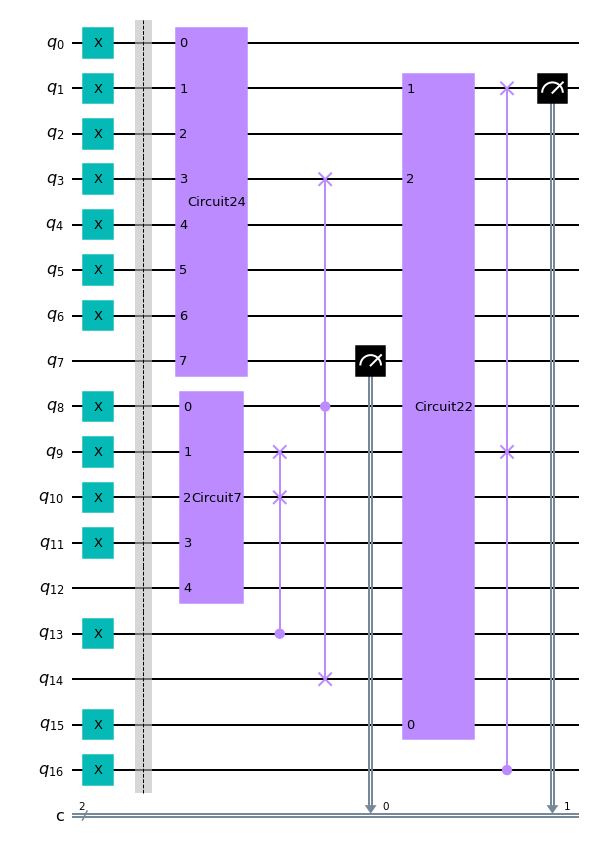

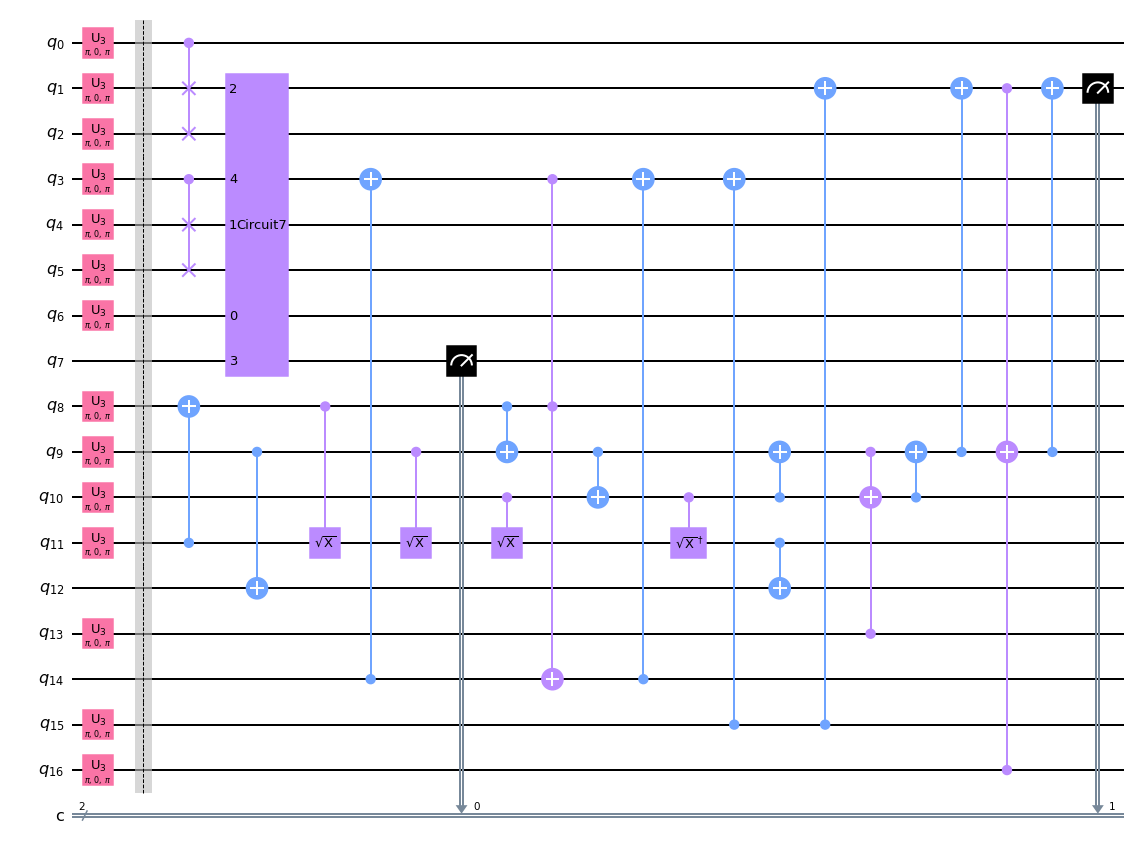

In [7]:
print('{} {} {} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for S5 in ['0', '1']:
                        for Cin in ['0', '1']:
                            for A in ['0', '1']:
                                for B in ['0', '1']: 
                                    qc, output = ALUpre(S0, S1, S2, S3, S4, S5, Cin, A, B)
                                    print('{}  {}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, S5, Cin, A, B), '=', output)
                    print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

In [13]:
def ALU2(S0, S1,S2, S3, S4, S5, Cin, A, B):
    qc = QuantumCircuit(12, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
    if(S0 == '1'):
        qc.x(1)
    if(S1== '1'):
        qc.x(2)
    if(Cin == '1'):
        qc.x(6) 
    if(B == '1'):
        qc.x(3)
    if(S2 == '1'):
        qc.x(4)
    if(S3 == '1'):
        qc.x(5)
    if(S4 == '1'):
        qc.x(8)
    if(S5 == '1'):
        qc.x(9)
    qc.barrier()
    
    
    
    #adding the fredkin gate
    qc.cswap(0, 1, 2)
    qc.cswap(3, 4, 5)
    
    #importing the zplg gate
    qc.append(zplg_gate, [6, 4, 1, 7, 3])
    
   
    
    #LOGIC GATES
    #adding the zplg gate
    qc.append(zplg_gate, [1, 0, 3, 2, 10])
    
    #adding the fredkin gate
    qc.cswap(4, 0, 2)
    qc.cswap(1, 3, 11)
    
     #adding the double feynman gate
    qc.append(f2g_gate, [8, 1, 3])
    
    
    qc.cswap(9, 1, 0)
    
    #measurements of the carry
    qc.measure(7, 0)
    
    #measuring the output
    qc.measure(3, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 S5 Cin A B = s c/b
0  0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  0  1 = 10
0  0  0  0  0  0  0  1  0 = 10
0  0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  0  1  0  0 = 00
0  0  0  0  0  0  1  0  1 = 00
0  0  0  0  0  0  1  1  0 = 00
0  0  0  0  0  0  1  1  1 = 00
0  0  0  0  0  1  0  0  0 = 00
0  0  0  0  0  1  0  0  1 = 10
0  0  0  0  0  1  0  1  0 = 10
0  0  0  0  0  1  0  1  1 = 00
0  0  0  0  0  1  1  0  0 = 00
0  0  0  0  0  1  1  0  1 = 00
0  0  0  0  0  1  1  1  0 = 00
0  0  0  0  0  1  1  1  1 = 00
----------------------
0  0  0  0  1  0  0  0  0 = 10
0  0  0  0  1  0  0  0  1 = 00
0  0  0  0  1  0  0  1  0 = 00
0  0  0  0  1  0  0  1  1 = 10
0  0  0  0  1  0  1  0  0 = 10
0  0  0  0  1  0  1  0  1 = 10
0  0  0  0  1  0  1  1  0 = 10
0  0  0  0  1  0  1  1  1 = 10
0  0  0  0  1  1  0  0  0 = 10
0  0  0  0  1  1  0  0  1 = 00
0  0  0  0  1  1  0  1  0 = 00
0  0  0  0  1  1  0  1  1 = 10
0  0  0  0  1  1  1  0  0 = 10
0  0  0  0  1  1  1  0  1 = 10
0  0  0  0  1

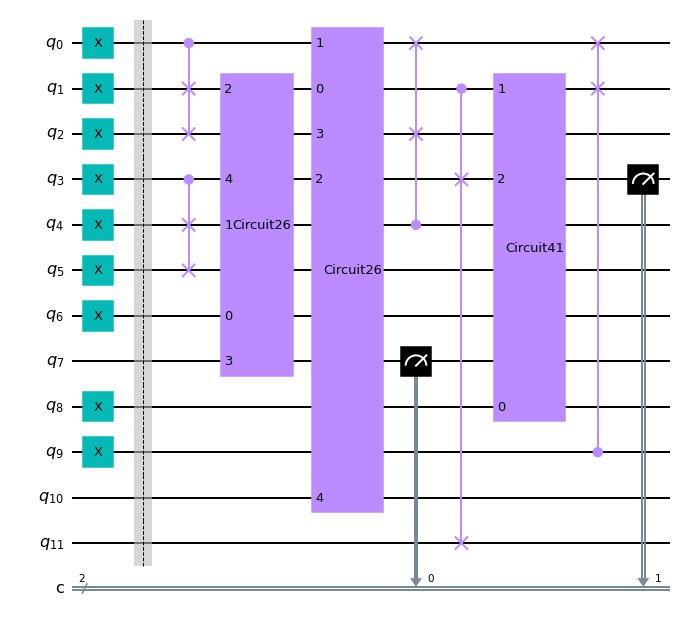

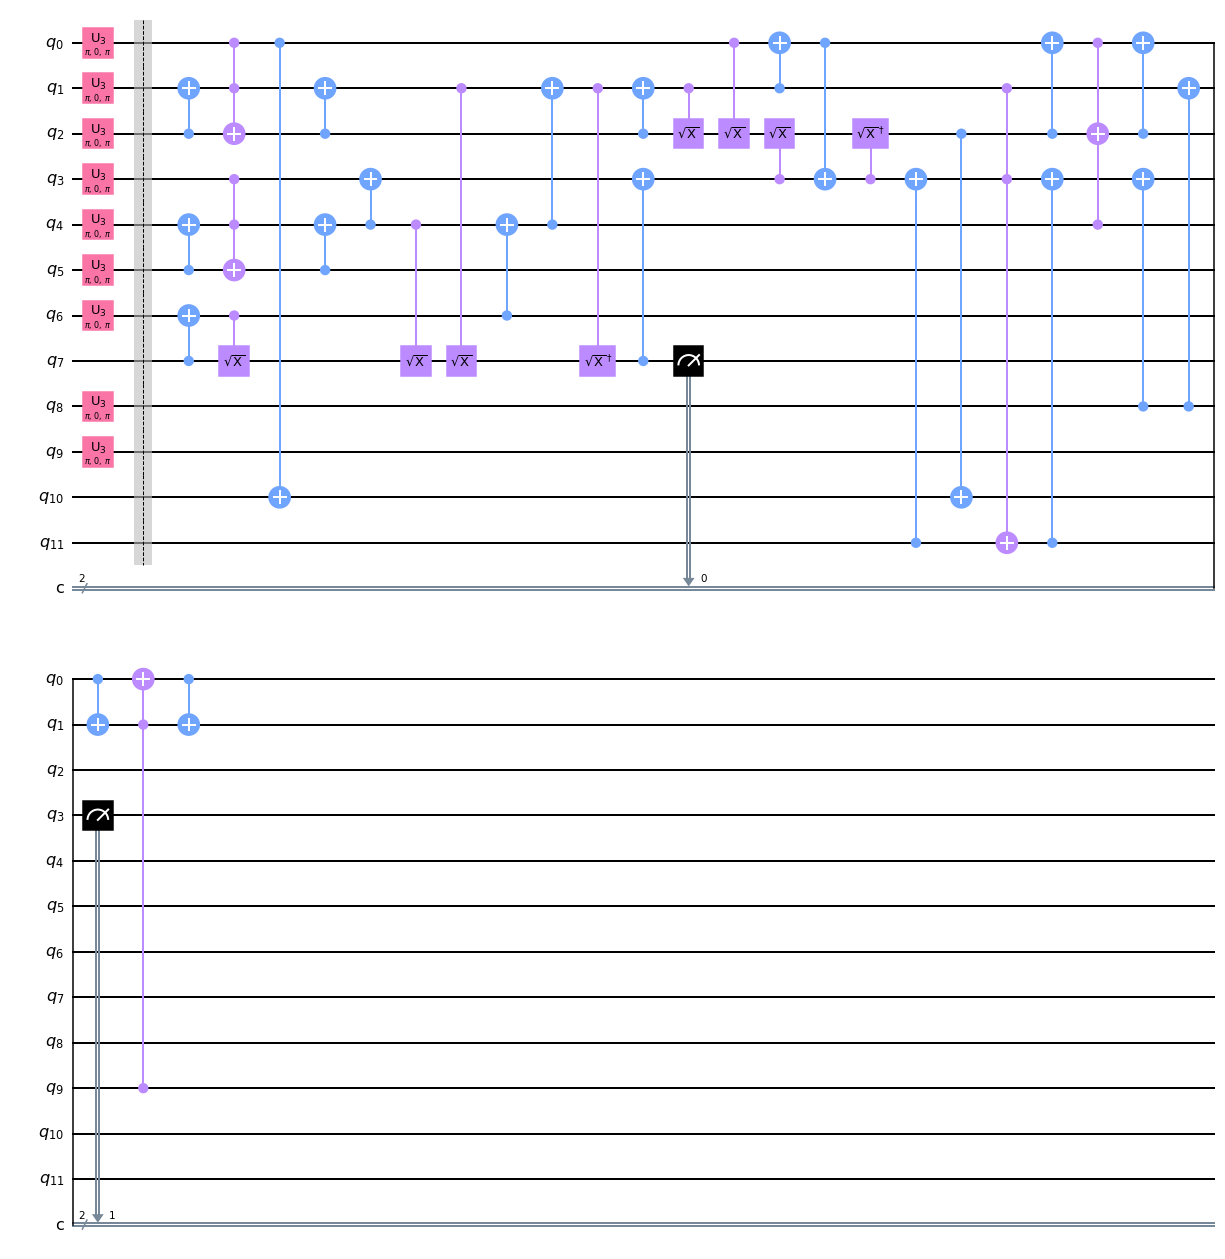

In [14]:
print('{} {} {} {} {} {} {} {} {}'.format('S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for S5 in ['0', '1']:
                        for Cin in ['0', '1']:
                            for A in ['0', '1']:
                                for B in ['0', '1']: 
                                    qc, output = ALU2(S0, S1, S2, S3, S4, S5, Cin, A, B)
                                    print('{}  {}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, S5, Cin, A, B), '=', output)
                    print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

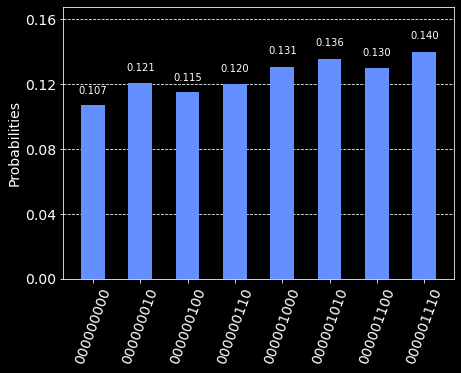

In [12]:
#histogram plot of the ALU 2 gate

qc = QuantumCircuit(17, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 9, 10)
qc.cswap(8, 3, 14)

#addding last gates
qc.append(f2g_gate, [15, 1 , 3])
qc.cswap(16, 1, 9)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(1, 1)

qc.measure(3, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

In [5]:
IBMQ.load_account()
IBMQ.providers()
providers = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

simulator_mps has 7 queued and simulated qubits
ibmq_qasm_simulator has 6 queued and simulated qubits
ibmq_armonk has 0 queued and 1 qubits
simulator_statevector has 5 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_bogota has 4 queued and 5 qubits
ibmq_lima has 22 queued and 5 qubits
ibmq_santiago has 62 queued and 5 qubits
ibmq_belem has 3 queued and 5 qubits
ibmq_quito has 14 queued and 5 qubits
simulator_stabilizer has 6 queued and simulated qubits
ibmq_manila has 38 queued and 5 qubits
simulator_extended_stabilizer has 7 queued and simulated qubits


Job Status: job has successfully run
None


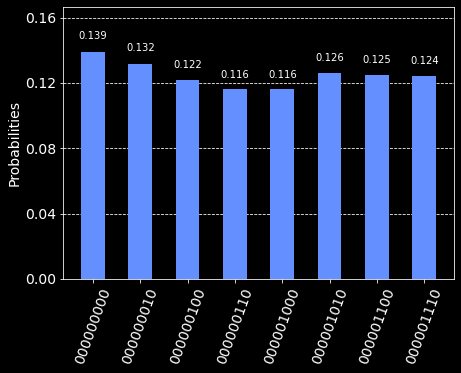

In [17]:
#histogram plot of the ALU 2 gate

qc = QuantumCircuit(17, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 9, 10)
qc.cswap(8, 3, 14)

#addding last gates
qc.append(f2g_gate, [15, 1 , 3])
qc.cswap(16, 1, 9)

#measurements of the carry
qc.measure(7, 0)

#measuring the output
qc.measure(1, 1)

qc.measure(3, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

MODIFIED ALU DESIGN 2

In [5]:
##adding pre defined gates -modified
def ALUmod(S0, S1,S2, S3, S4, Cin, A, B):
    qc = QuantumCircuit(16, 2)
    
    #conditions
    if(A == '1'):
        qc.x(0)
        qc.x(9)
    if(S0 == '1'):
        qc.x(1)
        qc.x(8)
    if(S1== '1'):
        qc.x(2)
        qc.x(11)
    if(Cin == '1'):
        qc.x(6) 
    if(B == '1'):
        qc.x(3)
        qc.x(10)
    if(S2 == '1'):
        qc.x(4)
        qc.x(13)
    if(S3 == '1'):
        qc.x(5)
    if(S4 == '1'):
        qc.x(15)
    qc.barrier()
    
    #adding au circuit
    qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])
    
    #addding lu gates
    qc.append(zplg_gate, [8, 9, 10, 11, 12])
    qc.cswap(13, 10, 11)
    qc.cswap(15, 1, 10)
    qc.cswap(8, 3, 14)
    
    #measurements
    qc.measure(7, 0)
    qc.measure(1, 1)
    
    #backend
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

S0 S1 S2 S3 S4 Cin A B  = s c/b
0  0  0  0  0  0  0  0 = 00
0  0  0  0  0  0  0  1 = 00
0  0  0  0  0  0  1  0 = 00
0  0  0  0  0  0  1  1 = 00
0  0  0  0  0  1  0  0 = 10
0  0  0  0  0  1  0  1 = 10
0  0  0  0  0  1  1  0 = 10
0  0  0  0  0  1  1  1 = 10
0  0  0  0  1  0  0  0 = 00
0  0  0  0  1  0  0  1 = 10
0  0  0  0  1  0  1  0 = 10
0  0  0  0  1  0  1  1 = 00
0  0  0  0  1  1  0  0 = 00
0  0  0  0  1  1  0  1 = 10
0  0  0  0  1  1  1  0 = 10
0  0  0  0  1  1  1  1 = 00
----------------------
0  0  0  1  0  0  0  0 = 00
0  0  0  1  0  0  0  1 = 10
0  0  0  1  0  0  1  0 = 00
0  0  0  1  0  0  1  1 = 10
0  0  0  1  0  1  0  0 = 10
0  0  0  1  0  1  0  1 = 01
0  0  0  1  0  1  1  0 = 10
0  0  0  1  0  1  1  1 = 01
0  0  0  1  1  0  0  0 = 00
0  0  0  1  1  0  0  1 = 10
0  0  0  1  1  0  1  0 = 10
0  0  0  1  1  0  1  1 = 00
0  0  0  1  1  1  0  0 = 00
0  0  0  1  1  1  0  1 = 11
0  0  0  1  1  1  1  0 = 10
0  0  0  1  1  1  1  1 = 01
----------------------
0  0  1  0  0  0  0  0 = 1

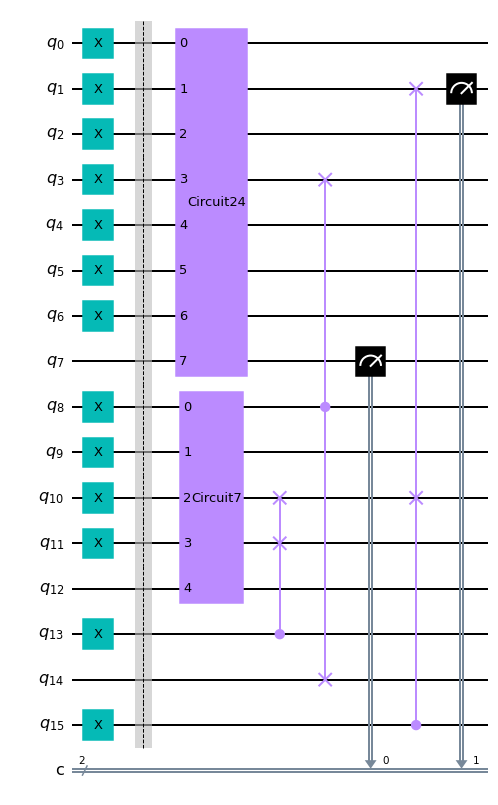

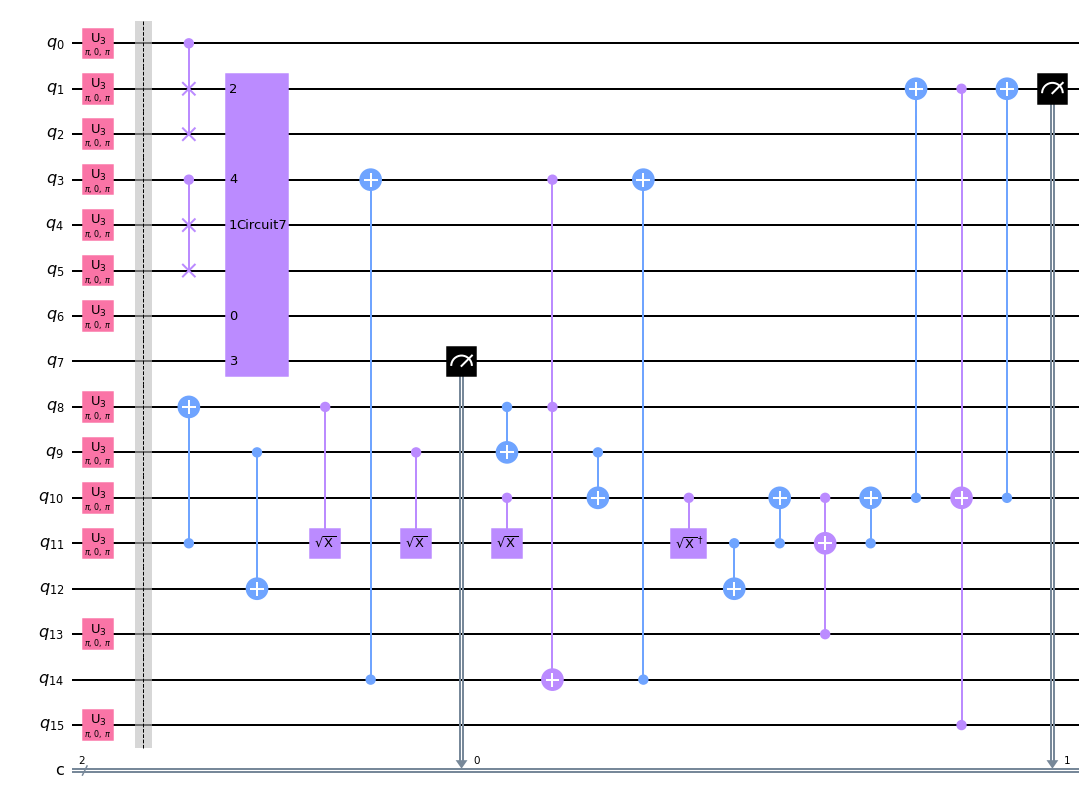

In [7]:
print('{} {} {} {} {} {} {} {} '.format('S0', 'S1', 'S2', 'S3', 'S4', 'Cin', 'A', 'B'), '=', 's c/b')
for S0 in ['0', '1']:
    for S1 in ['0', '1']:
        for S2 in ['0', '1']:
            for S3 in ['0', '1']:
                for S4 in ['0', '1']:
                    for Cin in ['0', '1']:
                        for A in ['0', '1']:
                            for B in ['0', '1']: 
                                qc, output = ALUmod(S0, S1, S2, S3, S4, Cin, A, B)
                                print('{}  {}  {}  {}  {}  {}  {}  {}'.format(S0, S1, S2, S3, S4, Cin, A, B), '=', output)
                print('----------------------')

display(qc.draw('mpl'))
display(qc.decompose().draw('mpl'))

Job Status: job has successfully run
None


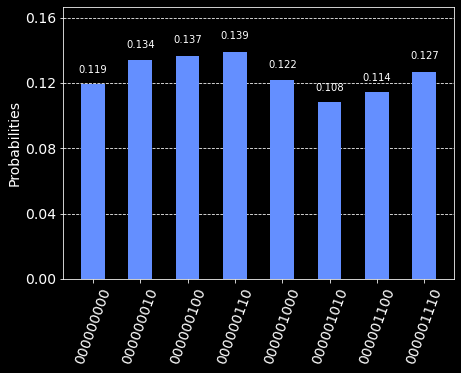

In [6]:
#histogram plot of the ALU 1 modified

qc = QuantumCircuit(16, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 10, 11)
qc.cswap(15, 1, 10)
qc.cswap(8, 3, 14)

#measurements
qc.measure(7, 0)
qc.measure(1, 1)


qc.measure(3, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
print(job_monitor(job))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

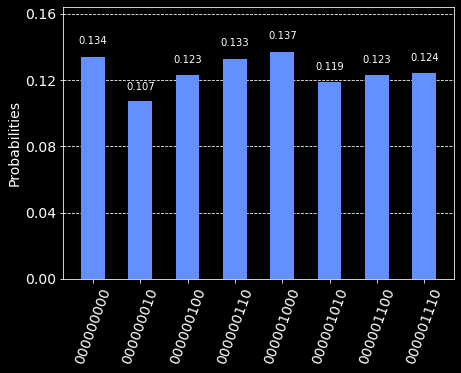

In [9]:
#histogram plot of the ALU 1 modified

qc = QuantumCircuit(16, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 10, 11)
qc.cswap(15, 1, 10)
qc.cswap(8, 3, 14)

#measurements
qc.measure(7, 0)
qc.measure(1, 1)


qc.measure(3, 2)
qc.measure(2, 3)
qc.measure(4, 4)
qc.measure(5, 5)
qc.measure(6, 6)
qc.measure(8, 7)

backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

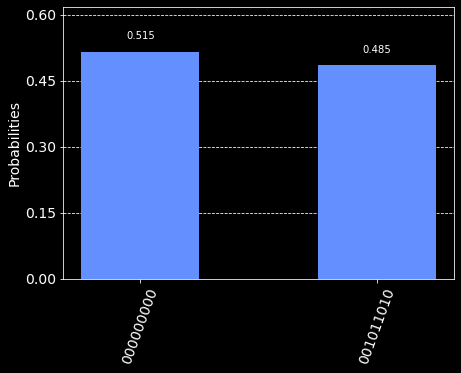

In [6]:
#histogram plot of the ALU 1 modified

qc = QuantumCircuit(16, 9)
for i in range(4):
    qc.h(i)

#adding au circuit
qc.append(au_gate, [0, 1, 2, 3, 4, 5, 6, 7])

#addding lu gates
qc.append(zplg_gate, [8, 9, 10, 11, 12])
qc.cswap(13, 10, 11)
qc.cswap(15, 1, 10)
qc.cswap(8, 3, 14)

#measurements
qc.measure(7, 0)
qc.measure(1, 1)


qc.measure(7, 2)
qc.measure(1, 3)
qc.measure(1, 4)
qc.measure(7, 5)
qc.measure(1, 6)
qc.measure(7, 7)

backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)